# Ayiti Analytics Data Processing Bootcamp
Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


### I. DATA WRANGLING <a name="wrangle"></a>

### A.- Data Loading 


In [557]:
# First, we start by importing the library we will need for manipulating the data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date 


In [558]:
# Here, we are loading the dataset in our environement
enroll = pd.read_csv("enroll.csv")
industry = pd.read_csv("industry.csv")
order = pd.read_csv("ord.csv")
quest =  pd.read_csv("quest.csv")
study_domain  = pd.read_csv("study_domain.csv")
technology =  pd.read_csv("technology.csv")
transaction =  pd.read_csv("transaction.csv")
Geo  = pd.read_excel('commune.xlsx', sheet_name= 0)

In [559]:
enroll.head()

,Unnamed: 0,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN
1,1,2020-12-13T14:41:17.720Z,NaN,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-13T14:41:17.720Z,NaN
2,2,2020-12-15T00:53:06.499Z,NaN,31987560,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-15T00:53:06.499Z,NaN
3,3,2020-12-18T18:38:55.683Z,NaN,35616451,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-18T18:38:55.683Z,NaN
4,4,2020-12-21T14:45:06.528Z,NaN,35390649,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-21T14:45:06.528Z,NaN


### B.- Data Processing 

### 1 - Merging The enrollement Dataset and the Commune dataset 
 This merging will allow us to identify the location of all the applicants.Before we process with the merging,we will do data manipulations on the values of the Departement and commune columns in the dataset

In [560]:
# Before the merging, we clean the created_at columns to make better process the data 
#This code will turn all the values in the columns in string
quest['department'] = quest['department'].apply(lambda x  : str(x))
#This code will transform all the strings in uppercase. The goal is to match the value in the quest dataset with commune dataset 
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())


In [561]:
#Here we can process with the merging
table1 = pd.merge(quest,Geo, how = 'left',left_on =['department','commune'],right_on = ['ADM1_PCODE','Commune_Id'])
table1.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01


### 2- Processing Date 

In [562]:
#We will get rid of the timestamp in the values of the column created_at dataset
y = pd.DataFrame(table1.created_at.str.split('T',1).tolist(),columns = ['Date_created_at','To_drop'])
y = y.iloc[:,0]
table1['created_at'] = y 
table1['created_at'].head()

0    2021-02-14
1    2021-02-16
2    2021-02-16
3    2021-02-16
4    2021-02-16
Name: created_at, dtype: object

### 3- Merging Ord and transaction dataset
 Here, We will work with the Transaction and Ord dataset in order to identify the Payment method of each bootcamp applicants. The merging process will filter the user enrolled in the course that do not applied for the bootcamp  

In [563]:
#We start our data merging with the enroll and transaction dataset
table3=pd.merge(enroll,transaction, how = 'right',left_on =['user_id'],right_on = ['user_id'] )
# We do the same process with the enroll and ord dataset
table4 =pd.merge(enroll,order, how = 'right',left_on =['user_id'],right_on = ['user_id'] )
#We create a new column with categorical variable on each table to specify the name of the payment
table3['Payment Method'] = 'Moncash'
table4['Payment Method'] = 'Credit Card/Paypal'


In [564]:
# Here we did and slicing and data cleaning 
x = table4.loc[:,['Payment Method','quest_id_y','percentage_completed']]
y = table3.loc[:,['Payment Method','quest_id','percentage_completed']]
x=x.rename(columns = {'quest_id_y': 'quest_id'})
#Let's concatenate the dataframe  
z = pd.concat([x,y],axis = 0)
display(z.head(20))

,Payment Method,quest_id,percentage_completed
0,Credit Card/Paypal,906b3c86-ce95-11eb-b6a7-7c67a234f601,0.325581
1,Credit Card/Paypal,906636cf-ce95-11eb-8679-7c67a234f601,0.023256
2,Credit Card/Paypal,906968f5-ce95-11eb-9e1a-7c67a234f601,0.604651
3,Credit Card/Paypal,9060477c-ce95-11eb-ace3-7c67a234f601,0.209302
4,Credit Card/Paypal,9064ff29-ce95-11eb-a3d3-7c67a234f601,0.023256
5,Credit Card/Paypal,9065740c-ce95-11eb-968f-7c67a234f601,0.023810
6,Credit Card/Paypal,906a52b7-ce95-11eb-9c4b-7c67a234f601,0.395349
7,Credit Card/Paypal,90617f12-ce95-11eb-a3c8-7c67a234f601,0.285714
8,Credit Card/Paypal,NaN,NaN
9,Credit Card/Paypal,9061312a-ce95-11eb-ba28-7c67a234f601,0.302326



We will update our main dataset with the payment method. We will list all the applicants who paid setting aside those who paid but did not applied for the bootcamp

### 4- Final Merging 

In [565]:
final = pd.merge(table1,z,how = 'left', left_on = 'quest_id', right_on= 'quest_id')
final.reset_index(inplace = True ,level = 0)
final['Payment Method'] = final['Payment Method'].fillna('No Payment')
final =final.loc[:,['gender','dob','commune','created_at','department','education_level','university','current_employed','formal_sector_job','have_computer_home','internet_at_home','hear_AA_1','after_AA','quest_id','Commune_en','Commune_Id','Departement','Payment Method','percentage_completed']]
final = final.set_index('quest_id')
final.head()


Delmas                    12
Port-au-Prince             8
Tabarre                    4
Petion-Ville               2
Carrefour                  1
Croix-Des-Bouquets         1
Cornillon / Grand Bois     1
Mirebalais                 1
Name: Commune_en, dtype: int64

In [566]:
#Working on the Date and Age of all applicants
# We will work on the date of birth columns.
final['dob'].replace({'3 aout 1977':'03/08/1977'},inplace = True)
final['dob'] = pd.to_datetime(final['dob'])
final['dob']

quest_id
905dc006-ce95-11eb-b2f9-7c67a234f601   1998-08-25
905ddcf2-ce95-11eb-9a92-7c67a234f601   1996-09-29
905e2608-ce95-11eb-809f-7c67a234f601   1996-05-17
905e4cf5-ce95-11eb-96a9-7c67a234f601   1996-11-24
905e73fd-ce95-11eb-a7b0-7c67a234f601   1997-07-20
                                          ...    
906b3c84-ce95-11eb-8c2a-7c67a234f601   1994-02-15
906b3c85-ce95-11eb-9b87-7c67a234f601   1990-08-10
906b3c86-ce95-11eb-b6a7-7c67a234f601   1993-12-28
906b65e2-ce95-11eb-8b5c-7c67a234f601   1992-04-17
906b65e3-ce95-11eb-a294-7c67a234f601   1993-07-22
Name: dob, Length: 250, dtype: datetime64[ns]


## 

In [645]:
#II - Setting up the Age columns and cleaning incorrect data.

#N.B : We replace incorrect data about age with the mean of the age  of the applicants



def Calculate_Age(born) :
    """
    This function will allow us to calcute the age of all the applicants by the end of the application process
    """
    today = date(2021,6,18)
    return today.year - born.year - ((today.month,today.day)< (born.month,born.day))

final['Age'] = final['dob'].apply(Calculate_Age)
final['Age'] = final['Age'].fillna(final['Age'].mean())
#we find incorrect input in dataset. we replace with mean of the age of the applicants
final['Age'].replace({(1,0,-1):final['Age'].mean()},inplace = True)
final['Age'] = final['Age'].apply(lambda x : int(x))
move = final.pop('Age')
final.insert(2,'Age',move)
final=final.rename(columns = {' Date_of_registration': 'Date'})
final.columns

Index(['gender', 'dob', 'Age', 'commune', 'Date', 'department',
       'education_level', 'university', 'current_employed',
       'formal_sector_job', 'have_computer_home', 'internet_at_home',
       'hear_AA_1', 'after_AA', 'Commune_en', 'Commune_Id', 'Departement',
       'Payment Method'],
      dtype='object')

### C - Exploratory Data Analysis


## Context
We were asked by Ayiti analytics to find 3 communes were they can most likely extend their training centers in the country. we were a giving a dataset from their  bootcamp application forms to draw insights for the executive boards so they can make decisions for the future.


### Descriptive Analysis
In total form the dataset , we had 250 applications for the 2021 Bootcamp of which 203 males and 43 females with an average age of 27.6 years and 26.44 years respectively.  148 of the applicants were university students, 33 were high school students. The most represented communes were Delmas with 71 applicants, Port-Au-Prince with 57 applicants,Petion-ville with 29 students and Carrefour with 23 applicants. These communes were also on top for communes where the most percentage applicants have acces to internet and have a computer at home. 

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,47.0,26.446809,5.278375,21.0,23.0,26.0,27.5,45.0
male,203.0,27.699507,5.461236,19.0,24.0,26.0,30.0,50.0


<AxesSubplot:title={'center':'Average age of applicants by Gender'}, xlabel='gender', ylabel='Age'>

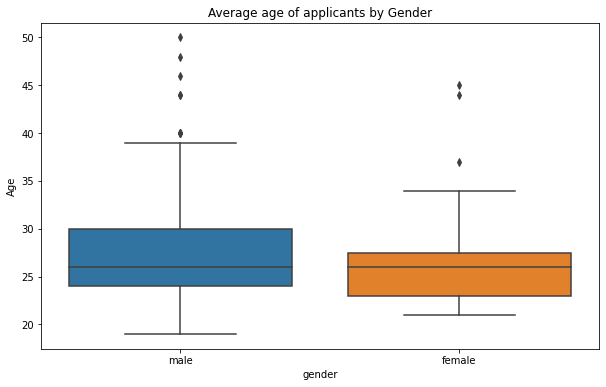

In [671]:
display(final['Age'].groupby(by= final['gender']).describe())
plt.figure(figsize=(10,6))
plt.title('Average age of applicants by Gender')
sns.boxplot(data=final,x="gender",y="Age")

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
Bachelors (bacc +4),148.0,27.959459,4.916830,21.0,25.0,26.0,30.00,46.0
"Doctorate (PhD, MD, JD)",1.0,31.000000,NaN,31.0,31.0,31.0,31.00,31.0
High School (16 years),33.0,23.181818,3.477198,19.0,21.0,23.0,24.00,38.0
Masters,14.0,34.000000,7.452413,24.0,29.0,33.0,34.75,50.0
Other,51.0,26.725490,4.733195,21.0,23.0,26.0,29.00,40.0
unknown,3.0,31.000000,11.532563,22.0,24.5,27.0,35.50,44.0


Text(0.5, 1.0, 'Boxplot of applicants by education level')

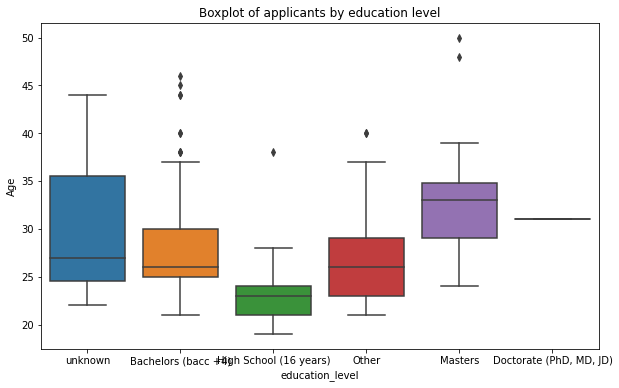

In [679]:
display(final['Age'].groupby(by= final['education_level']).describe())
plt.figure(figsize=(10,6))
sns.boxplot(data=final,x="education_level",y="Age")
plt.title('Boxplot of applicants by education level')


In [570]:

def generate_barchart(data=result, title ="",abs_value ="Total",rel_value="Percent",figsize =(15,8),ylabel="") :
    '''
    This function we define here will generate bar chart with more information on the data  
    '''
    plt.figure(figsize=figsize)
    axes = sns.barplot(data=data,x=data.index,y=abs_value)
    i=0
    for tot, perc in zip(data[abs_value],data[rel_value]):
        axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
        axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
        ax.set( ylabel=ylabel)      
    
        i+=1
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()


,Total,Percent
Delmas,71,0.286290
Port-au-Prince,57,0.229839
Petion-Ville,29,0.116935
Carrefour,23,0.092742


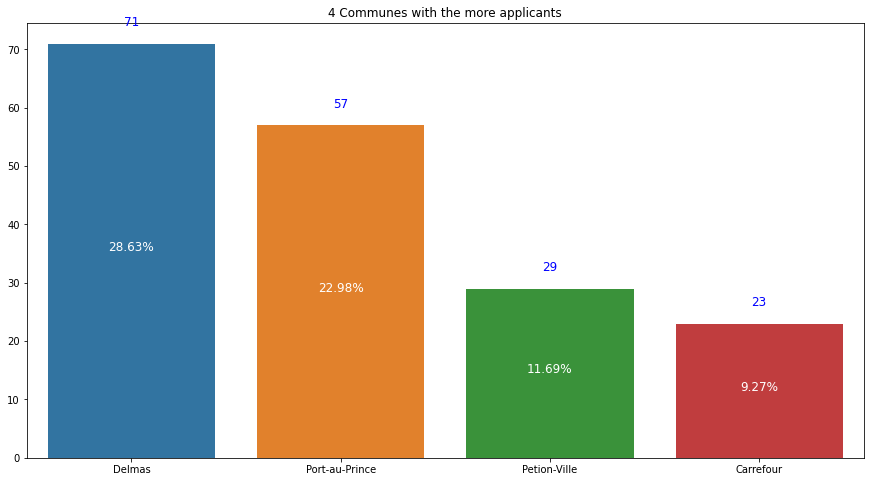

In [571]:
Com = final.Commune_en.value_counts().to_frame().iloc[:4,:]
Com.rename(columns={"Commune_en":"Total"},inplace=True)
Com1 = final.Commune_en.value_counts(normalize = True).to_frame().iloc[:4,:]
Com1.rename(columns={"Commune_en":"Percent"},inplace=True)
resul = pd.concat([Com,Com1],axis =1)

resul.reset_index()
display(resul)

generate_barchart(resul,title ="4 Communes with the more applicants", abs_value="Total",rel_value='Percent' )

### How many applications must be made to select 25% women for each on average ?

In [778]:
gender_table = pd.pivot_table(final,'Age',index='Commune_en',columns=['gender'],aggfunc = ['count'],fill_value=0)
gender_table = gender_table.sort_values(by= ('count','female'),ascending = False)
gender_table['Total'] =gender_table[('count','female')] +gender_table[('count','male')]

gender_table['Percentage of female'] =gender_table[('count','female')]/(gender_table[('Total')])
gender_table.iloc[:4,:] = t


In [796]:
#gender_table.iloc[:4,:] 

t['mean']= np.round(t['Percentage of female'].mean(),2)
#Determinons le pourcentage d'applications manquants en moyenne par commune pour atteindre les 25%
t['perct_mean'] = 0.25 - t['mean']
t['expectation'] = np.round((t['perct_mean']) * t['Total'],2)
t['mean_excp'] = np.round((t['expectation'] + t[('count','female')]) / (t['Total'] + t['expectation']),4)
t['mean2'] = np.round(t['mean_excp'].mean(),2)


<ipython-input-796-7c66140d3dda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['mean']= np.round(t['Percentage of female'].mean(),2)
<ipython-input-796-7c66140d3dda>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['perct_mean'] = 0.25 - t['mean']
<ipython-input-796-7c66140d3dda>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [800]:
print('The number applications of women  to obtain 25 % on average should exceed :',np.round(t['expectation'].sum(),2), 'in the first 4 communes ')

The number applications of women  to obtain 25 % on average should exceed : 3.6 in the first 4 communes 


In [573]:
education_table = pd.pivot_table(final,'Age',index='Commune_en',columns=['education_level'],aggfunc = ['count'],fill_value=0)
education_table.sort_values(by=('count','Bachelors (bacc +4)'),ascending = False).iloc[:4,[0,1,3]]
final

,gender,dob,Age,commune,Date_of_registration,department,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,Commune_en,Commune_Id,Departement,Payment Method,percentage_completed
quest_id,,,,,,,,,,,,,,,,,,,
905dc006-ce95-11eb-b2f9-7c67a234f601,male,1998-08-25,22,HT0111,2021-02-14,NAN,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,NaN,NaN,NaN,No Payment,NaN
905ddcf2-ce95-11eb-9a92-7c67a234f601,female,1996-09-29,24,HT0111,2021-02-16,HT01,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Friend,Finding a job/internship,Port-au-Prince,HT0111,West,No Payment,NaN
905e2608-ce95-11eb-809f-7c67a234f601,male,1996-05-17,25,HT0111,2021-02-16,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),No,unknown,Yes,Yes,Friend,Improving my data analysis skills,Port-au-Prince,HT0111,West,Moncash,0.325581
905e4cf5-ce95-11eb-96a9-7c67a234f601,male,1996-11-24,24,HT0111,2021-02-16,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,Port-au-Prince,HT0111,West,No Payment,NaN
905e73fd-ce95-11eb-a7b0-7c67a234f601,male,1997-07-20,23,HT0111,2021-02-16,HT01,High School (16 years),unknown,No,unknown,Yes,Yes,WhatsApp,Mentorship,Port-au-Prince,HT0111,West,No Payment,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906b3c84-ce95-11eb-8c2a-7c67a234f601,male,1994-02-15,27,HT0621,2021-03-02,HT06,Bachelors (bacc +4),other,Yes,Yes,Yes,Yes,Facebook,Improving my data analysis skills,Mirebalais,HT0621,Centre,Moncash,0.883721
906b3c85-ce95-11eb-9b87-7c67a234f601,male,1990-08-10,30,HT0621,2021-03-10,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,Mirebalais,HT0621,Centre,No Payment,NaN
906b3c86-ce95-11eb-b6a7-7c67a234f601,male,1993-12-28,27,HT0621,2021-03-14,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,Mirebalais,HT0621,Centre,Credit Card/Paypal,0.325581


                   Total     Percent
internet_at_home     Yes            
have_computer_home    No Yes        
Commune_en                          
Delmas                 3  58   0.232
Port-au-Prince         0  51   0.204
Petion-Ville           4  21   0.084
Carrefour              1  17   0.068


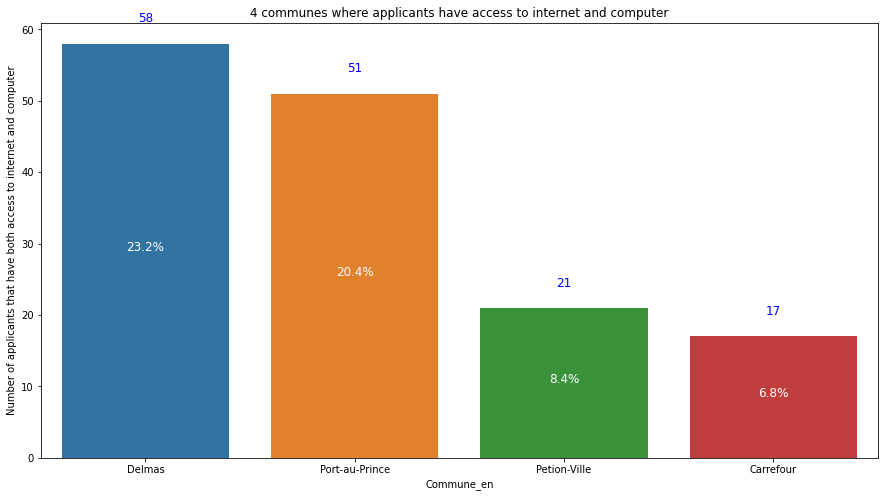

In [809]:
reg = pd.pivot_table(final,'Age',index='Commune_en',columns=['internet_at_home','have_computer_home'],aggfunc = ['count'],fill_value=0)
reg = reg.sort_values(by=('count','Yes','Yes'),ascending = False)
reg = reg.iloc[:4,[2,3]]
reg['Percent'] = reg[('count','Yes','Yes')]/final.shape[0]
reg.rename(columns={"count":"Total"},inplace=True)
print(reg)
generate_barchart(reg,title = "4 communes where applicants have access to internet and computer", abs_value = ('Total','Yes','Yes') , rel_value = 'Percent',ylabel='Number of applicants that have both access to internet and computer')



In [575]:
#Let's start by creating a pivot table on the communication channels and gender columns 
result2 = pd.pivot_table(final,'Age',index =['hear_AA_1'] ,columns=['gender'],aggfunc=['count'],fill_value = 0)
#we are sorting the values from biggest to smallest and filter the 3 first
result2= result2.sort_values(by = ('count','male'),ascending = False)
result2 = result2.iloc[:4,:]
result2

count     
gender    female male
hear_AA_1            
WhatsApp       9   57
Friend        11   56
Facebook       6   34
LinkedIn       1   14

In [576]:
result = np.round(table1['university'].value_counts(normalize =False),2).to_frame()
print(result)


                                                    university
unknown                                                     95
other                                                       55
Université d'Etat d'Haïti (UEH)                             39
Ecole Supérieure d'Infotronique d'Haïti (ESIH)              27
Centre de Techniques de Planification et d'Econ...          16
Université INUKA                                            14
Quisqueya University                                         4


### What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection ?



                                     count                                \
hear_AA_1          Ayiti Analytics Website Bootcamp Alumni ESIH Facebook   
Payment Method                                                             
Credit Card/Paypal                       0               1    0        2   
Moncash                                  3               7    4        7   

                                                                     
hear_AA_1          Friend Instagram LinkedIn WhatsApp other unknown  
Payment Method                                                       
Credit Card/Paypal      5         1        0        4     1       0  
Moncash                17         0        3        9     1       0  


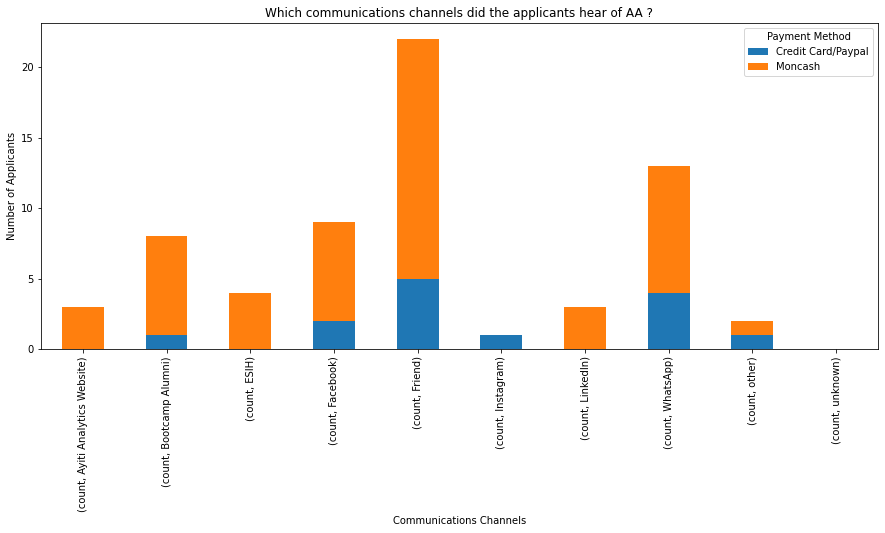

In [760]:
result2 = pd.pivot_table(final,'Age',index = ['Payment Method'],columns=['hear_AA_1'],aggfunc=['count'],dropna = True,fill_value = 0)

result2 = result2.iloc[:2,:]
print(result2)
ax = result2.sort_index().T.plot(kind='bar',figsize=(15,6),stacked = True)
ylab = ax.set_ylabel('Number of Applicants')
xlab = ax.set_xlabel('Communications Channels')
title = ax.set_title('Which communications channels did the applicants hear of AA ?')
y = result2

### What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

count                                  \
hear_AA_1          Ayiti Analytics Website Bootcamp Alumni   ESIH Facebook   
gender                              female          female female   female   
Payment Method                                                               
Credit Card/Paypal                       0               1      0        1   
Moncash                                  0               2      0        1   

                                                                      
hear_AA_1          Friend Instagram LinkedIn WhatsApp  other unknown  
gender             female    female   female   female female    male  
Payment Method                                                        
Credit Card/Paypal      1         0        0        2      0       0  
Moncash                 2         0        1        2      1       0

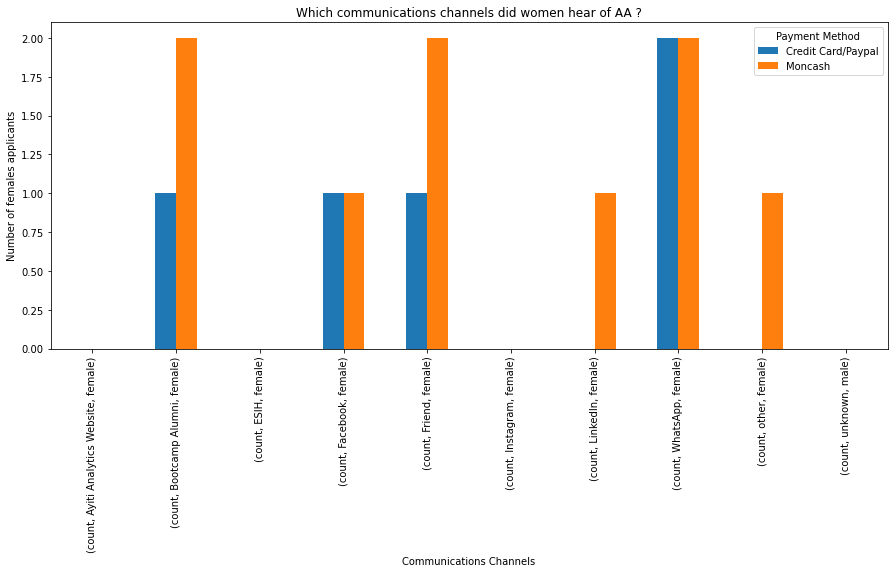

In [806]:
result3 = pd.pivot_table(final,'Age',index = ['Payment Method'],columns=['hear_AA_1','gender'],aggfunc=['count'],dropna = True,fill_value = 0)
result3 = result3.iloc[:2,[0,2,4,6,8,10,12,14,16,18]]
display(result3)

ax = result3.sort_index().T.plot(kind='bar',figsize=(15,6))
ylab = ax.set_ylabel('Number of females applicants')
xlab = ax.set_xlabel('Communications Channels')
title = ax.set_title('Which communications channels did women hear of AA ?')


In [688]:
result9 =final[(final['education_level'] =='Bachelors (bacc +4)') | (final['education_level'] =='Masters') | (final['education_level'] =='Doctorate (PhD, MD, JD)')  ]

result9.shape[0]/final.shape[0]*30


19.560000000000002

### What will be the average number of applications per week that we could have ?

In [812]:
dg = final.groupby(pd.Grouper(key='date', freq='7D'))['Date'].value_counts().to_frame()
dg = dg.reset_index(level = 0)
dg['Ind'] =dg.date
dg = dg.iloc[:,[2,1]]
dg = dg.groupby(by='Ind').sum()
dg['Number of weeks'] = ['Week 1','Week 2','Week 3','Week 4','Week 5']
dg = dg.set_index('Number of weeks')


,Date,mean
Number of weeks,,
Week 1,136,50.0
Week 2,54,50.0
Week 3,29,50.0
Week 4,29,50.0
Week 5,2,50.0


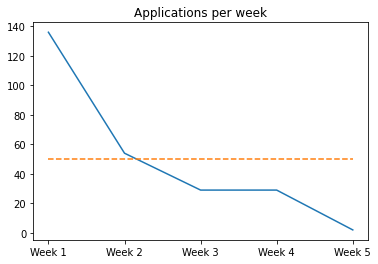

In [813]:
#Setting up the mean column in the table 
dg['mean'] = dg.Date.mean()
display(dg)
print( 'Thr')
#plotting  the table
plt.grid=True
plt.plot(dg.index,dg.Date,label='Registration')
plt.plot(dg.index,dg['mean'],label='mean',linestyle = '--')
plt.title('Applications per week')
plt.show()
